In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import multivariate_normal

## Let us generate simple dataset for UE methods testing

## 0) Generate gaussian 2d random variable

In [5]:
class_to_mean = {0: [2, -2], 1: [0.5, 2], 2: [-0.5, -0.2]}
class_to_cov = {
    0: [[2.0, 0.3], [0.3, 1.5]],
    1: [[3.0, 0], [0, 0.5]],
    2: [[2.0, 0.3], [0.3, 0.5]],
}
class_to_color = {0: "red", 1: "green", 2: "blue"}

In [6]:
class_to_normal = {
    id: multivariate_normal(class_to_mean[id], class_to_cov[id])
    for id in class_to_mean.keys()
}

In [7]:
np.random.seed(seed=3)
n_points = 50
class_to_samples = {
    id: class_to_normal[id].rvs(n_points) for id in class_to_mean.keys()
}

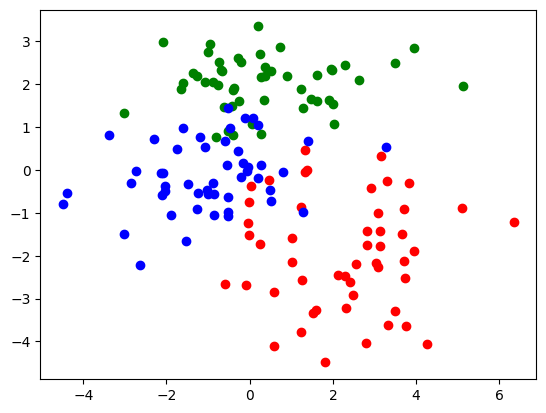

In [8]:
for id in class_to_mean.keys():
    plt.scatter(
        class_to_samples[id][:, 0], class_to_samples[id][:, 1], c=class_to_color[id]
    )

## Compute softmax scores

In [25]:
import itertools

sample_to_distances = {}
sample_to_softmax = {}
for id, sample in itertools.product(class_to_mean.keys(), range(n_points)):
    dist = []
    for new_id in class_to_mean.keys():
        dist.append(
            np.linalg.norm(class_to_samples[id][sample] - class_to_mean[new_id])
        )
    sample_to_distances[(id, sample)] = np.array(dist)
    sample_to_softmax[(id, sample)] = scipy.special.softmax(
        -sample_to_distances[(id, sample)]
    )